In [1]:
import pandas as pd

#importing dataset
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Understanding the data

In [2]:
print(df)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]


In [3]:
df.shape

(1014, 7)

# Cleaning the data 

In [4]:
#checking null values
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [5]:
#Dropping the missing rows.
df = df.dropna(how = 'any')
df.shape

(1014, 7)

In [6]:
#detecting missing values
print(df.isna().sum())

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [7]:
#filtering outliers using z-score
import pandas as pd
import numpy as np
from scipy import stats
df = df[(np.abs(stats.zscore(df.HeartRate)) < 2)]
print(df)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1012 rows x 7 columns]


In [8]:
#filtering outlier susing quantiles
q_low = df["HeartRate"].quantile(0.01)
q_hi  = df["HeartRate"].quantile(0.99)

#filtering outliers
df = df[(df["HeartRate"] < q_hi) & (df["HeartRate"] > q_low)]
print(df)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1008   48         120           80  11.0      98.0         88  high risk
1009   22         120           60  15.0      98.0         80  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[919 rows x 7 columns]


In [9]:
#dealing with duplicates
df1=df.duplicated().sum()
print(df1)

514


In [10]:
#dropping the duplicates
df1 = df.drop_duplicates()

#checking the duplicates
df1.duplicated().sum()

0

In [11]:
print(df1)

     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0     25         130           80  15.0      98.0         86  high risk
1     35         140           90  13.0      98.0         70  high risk
2     29          90           70   8.0     100.0         80  high risk
3     30         140           85   7.0      98.0         70  high risk
4     35         120           60   6.1      98.0         76   low risk
..   ...         ...          ...   ...       ...        ...        ...
672   15         100           49   6.0      99.0         77   low risk
673   12         100           50   6.4      98.0         70   mid risk
674   15         100           60   6.0      98.0         80   low risk
703   15         100           49   7.6      98.0         77   low risk
704   12         100           50   6.0      98.0         70   mid risk

[405 rows x 7 columns]


# Plotting the graphs

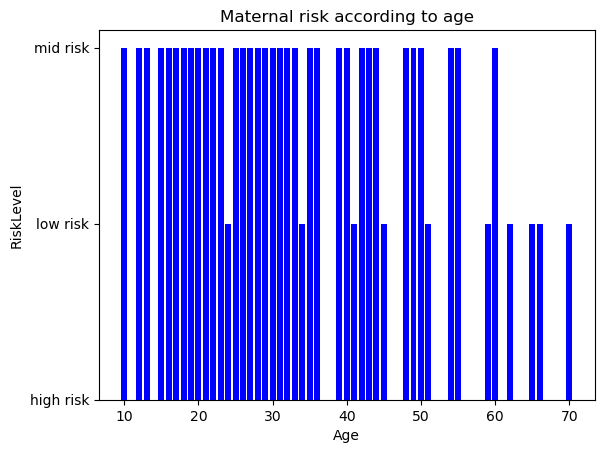

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

X = list(df1.iloc[:, 0])
Y = list(df1.iloc[:, 6])
plt.bar(X, Y, color='b')
plt.title("Maternal risk according to age")
plt.xlabel("Age")
plt.ylabel("RiskLevel")

# Show the plot
plt.show()

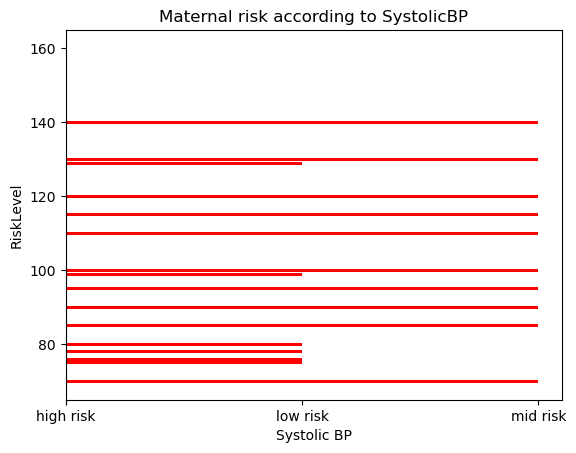

In [13]:
X = list(df1.iloc[:, 1])
Y = list(df1.iloc[:, 6])
plt.barh(X, Y, color='r')
plt.title("Maternal risk according to SystolicBP")
plt.xlabel("Systolic BP")
plt.ylabel("RiskLevel")

# Show the plot
plt.show()

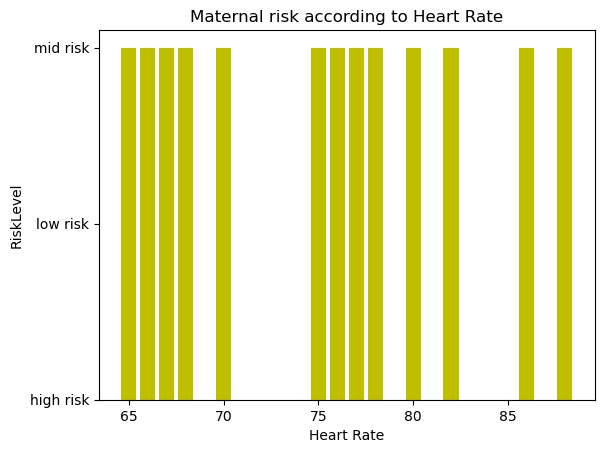

In [14]:
X = list(df1.iloc[:, 5])
Y = list(df1.iloc[:, 6])
plt.bar(X, Y, color='y')
plt.title("Maternal risk according to Heart Rate")
plt.xlabel("Heart Rate")
plt.ylabel("RiskLevel")

# Show the plot
plt.show()

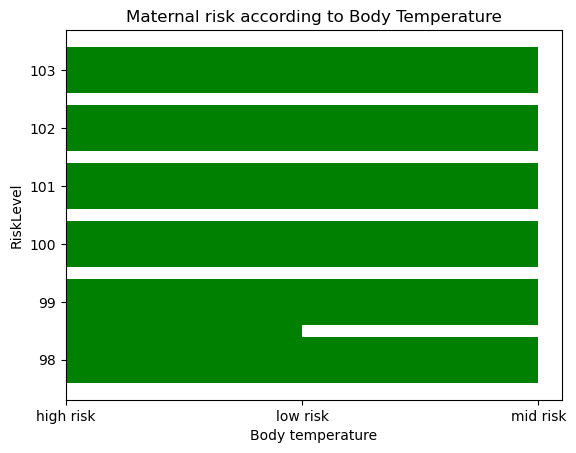

In [15]:
X = list(df1.iloc[:, 4])
Y = list(df1.iloc[:, 6])
plt.barh(X, Y, color='g')
plt.title("Maternal risk according to Body Temperature")
plt.xlabel("Body temperature")
plt.ylabel("RiskLevel")

# Show the plot
plt.show()

<Axes: >

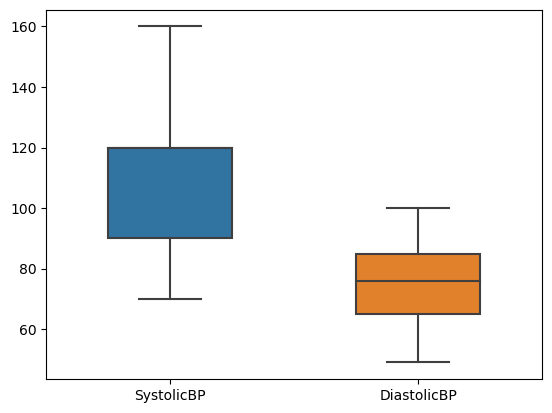

In [17]:
import seaborn as sns
df2 = df1[['SystolicBP', 'DiastolicBP']]
sns.boxplot(data=df2, width=0.5,fliersize=5)